22 July 2015 -->
==

In [57]:
# Notes:
# Look at total degree
# Seperate Positive and Negative Weights
# Use group mat for removal
# Save order of removal
# Look at how the order relates to connectivity between the nodes
# Remove PiB+ Subjects

In [34]:
import numpy as np
import pandas as pd
no_geno = np.load('/home/jagust/dino/surf/no_geno.npy')
bacs_ids = np.genfromtxt('/home/jagust/dino/surf/subid_bacs.csv', delimiter='"', dtype = None)
# pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
# pib_df
bacs_ids = list(bacs_ids)
found, bac = [], []
for subid in bacs_ids:
    if len(subid)>6:
        s = subid[7:]
        if s in no_geno:
            print subid
            found.append(subid[7:])
            bac.append(subid[0:6])

In [58]:
incl = np.load('/home/jagust/dino/surf/inclusion_mat_paths.npy')
pib_pos = list(np.load('/home/jagust/dino/surf/pib_pos_subid.npy'))
pib_neg = list(np.load('/home/jagust/dino/surf/pib_neg_subid.npy'))

In [1]:
% matplotlib inline
import os
os.chdir('/home/jagust/dino/surf')
from surf import *

In [60]:
geno_neg_pib_neg, geno_neg_pib_pos, geno_pos_pib_neg, geno_pos_pib_pos = [], [], [], []
for path in incl:
    subid = find_id(path)
    if is_geno_neg(subid):
        if subid in pib_neg:
            geno_neg_pib_neg.append(subid)
        if subid in pib_pos:
            geno_neg_pib_pos.append(subid)
    elif is_geno_pos(subid):
        if subid in pib_neg:
            geno_pos_pib_neg.append(subid)
        if subid in pib_pos:
            geno_pos_pib_pos.append(subid)

In [61]:
print len(geno_neg_pib_neg), len(geno_neg_pib_pos), len(geno_pos_pib_neg), len(geno_pos_pib_pos)

96 15 25 13


In [62]:
print "Subject Breakdown:"
print "E4-/PiB-: " + str(len(geno_neg_pib_neg))
print "E4-/PiB+: " + str(len(geno_neg_pib_pos))
print "E4+/PiB-: " + str(len(geno_pos_pib_neg))
print "E4+/PiB+: " + str(len(geno_pos_pib_pos))

Subject Breakdown:
E4-/PiB-: 96
E4-/PiB+: 15
E4+/PiB-: 25
E4+/PiB+: 13


In [54]:
96 + 15 + 25 + 13

149

Subject Matched Pairs
==

In [74]:
np.save('/home/jagust/dino/surf/subject_classes/geno_neg_pib_neg.npy', geno_neg_pib_neg)
np.save('/home/jagust/dino/surf/subject_classes/geno_neg_pib_pos.npy', geno_neg_pib_pos)
np.save('/home/jagust/dino/surf/subject_classes/geno_neg_pib_neg.npy', geno_pos_pib_neg)
np.save('/home/jagust/dino/surf/subject_classes/geno_neg_pib_pos.npy', geno_pos_pib_pos)

In [106]:
matches = []

In [108]:
master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
subject_summary = pd.ExcelFile(master_subject_path).parse("Sheet1")

In [610]:
pos_match = ""
next_sub = 'B10-285' #geno_pos_pib_neg[24]
for path in incl:
    if next_sub in path:
        print path
        pos_match = path

/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B10-285_2013-09-27_adjmat.npy


In [611]:
subject_summary[subject_summary.LBLID == next_sub]

,Subsess,LBLID,Birthday,Age,Gender,Edu,E4_Copies,MRI_Magnet,MRI_TR,MRI_Timepoints,MRI_directory,MRI_arda_dir,MRI_date,PIB_bacs_dir,PIB_bacs_date,FDG_bacs_dir,FDG_bacs_date,Cog_dir,Cog_date
169,B10-285_2010-10-22,B10-285,1932-03-09,78,M,18,1,1.5T,2.2,185,/home/jagust/graph/data/mri1.5/rest/B10-285_20...,/home/jagust/arda/lblid/B10-285/MRI_1.5_2010-1...,2010-10-22,/home/jagust/bacs_pet/PIB/old/ecat/B10-285_v1/pib,2010-10-20,/home/jagust/bacs_pet/FDG/old/ecat/B10-285_v1/fdg,2010-10-20,/home/jagust/arda/lblid/B10-285/COG_S1_2010-07...,2010-07-16
170,B10-285_2013-09-27,B10-285,1932-03-09,81,M,18,1,1.5T,2.2,185,/home/jagust/graph/data/mri1.5/rest/B10-285_20...,/home/jagust/arda/lblid/B10-285/MRI2_1.5_2013-...,2013-09-27,/home/jagust/bacs_pet/PIB/old/ecat/B10-285_v2/pib,2013-12-05,/home/jagust/bacs_pet/FDG/old/ecat/B10-285_v2/fdg,2013-12-05,/home/jagust/arda/lblid/B10-285/COG_S4_2013-07...,2013-07-19


In [581]:
geno_neg_df = subject_summary[subject_summary.E4_Copies == 0.0]

In [623]:
# Find Matching Subjects
geno_neg_sex = geno_neg_df[geno_neg_df.Gender == 'M']
geno_neg_age = geno_neg_sex[geno_neg_sex.Age == 78]
geno_neg_edu = geno_neg_age[geno_neg_age.Edu == 18]
geno_neg_edu

,Subsess,LBLID,Birthday,Age,Gender,Edu,E4_Copies,MRI_Magnet,MRI_TR,MRI_Timepoints,MRI_directory,MRI_arda_dir,MRI_date,PIB_bacs_dir,PIB_bacs_date,FDG_bacs_dir,FDG_bacs_date,Cog_dir,Cog_date
49,B07-236_2010-04-23,B07-236,1931-06-28,78,M,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B07-236_20...,/home/jagust/arda/lblid/B07-236/MRI2_1.5_2010-...,2010-04-23,/home/jagust/bacs_pet/PIB/old/ecat/B07-236_v2/pib,2010-04-14,/home/jagust/bacs_pet/FDG/old/ecat/B07-236_v2/fdg,2010-04-14,/home/jagust/arda/lblid/B07-236/COG_S4_2009-11...,2009-11-05
94,B08-251_2008-10-08,B08-251,1930-09-27,78,M,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B08-251_20...,/home/jagust/arda/lblid/B08-251/MRI_1.5_2008-1...,2008-10-08,/home/jagust/bacs_pet/PIB/old/ecat/B08-251_v1/pib,2008-10-16,/home/jagust/bacs_pet/FDG/old/ecat/B08-251_v1/fdg,2008-10-16,/home/jagust/arda/lblid/B08-251/COG_S1_2008-10...,2008-10-01
308,B13-288_2013-06-27,B13-288,1935-06-04,78,M,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B13-288_20...,/home/jagust/arda/lblid/B13-288/MRI_1.5_2013-0...,2013-06-27,/home/jagust/bacs_pet/PIB/old/biograph/B13-288...,2013-06-06,/home/jagust/bacs_pet/FDG/old/biograph/B13-288...,2013-06-06,/home/jagust/arda/lblid/B13-288/COG_S1_2013-02...,2013-02-07


In [624]:
ind = 0
neg_sub = geno_neg_edu.LBLID.values[ind]
neg_subsess = geno_neg_edu.Subsess.values[ind]
# Need to redo checking PiB for [0:11]
neg_sub in geno_neg_pib_neg

True

In [625]:
for match in matches:
    if find_id(match[1]) == neg_sub:
        print "Already being used"

In [626]:
neg_match = ""
for p in incl:
    if neg_subsess in p:
        print p
        neg_match = p

/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B07-236_2010-04-23_adjmat.npy


In [627]:
matches.append((pos_match, neg_match))

In [628]:
matches

[(u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B06-235_2007-08-08_adjmat.npy',
  u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B13-265_2013-07-23_adjmat.npy'),
 (u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B07-228_2007-05-24_adjmat.npy',
  u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B05-216_2013-08-20_adjmat.npy'),
 (u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B07-230_2007-05-17_adjmat.npy',
  u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B13-296_2013-07-03_adjmat.npy'),
 (u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B07-238_2010-07-02_adjmat.npy',
  u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B06-203_2012-10-22_adjmat.npy'),
 (u'/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/B07-243_2010-05-24_adjmat.npy',
  u'/home/jagust/graph/d

In [322]:
# Notes:
# One year education difference b/w B07-230 and B13-2096
# One year education difference b/w B08-247 and B12-239
# One year age difference b/w B09-216 and B07-227
# One year age and one year edu difference between B09-260 and B06-202
# One year age difference b/w B10-282 and B08-207
# One year age diff / three year edu diff b/w B12-296 and B10-270
# One year age diff b/w B12-338 and B12-317
# Three year edu diff b/w B13-222 and B06-210
# One year age /two year age diff b/w B13-289 and B13-293
# Two year education difference b/w B12-302 and B13-307
# One year age difference b/w B13-303 and B12-316
# Two year education difference b/w B13-304 and B12-332
# One year age diff and two year edu diff b/w B13-312 and B06-219
# Two year education difference b/w B13-319 and B11-219
# Two year age, one year edu diff b/w B13-341 and B13-202

In [684]:
# Sanity check for two groups
pos_subs, neg_subs = {'female' : 0, 'male': 0, 'age': [], 'edu': []}, {'female' : 0, 'male': 0, 'age': [], 'edu': []}
for match in matches:
    pos_vals = subject_summary[subject_summary.Subsess == get_subsess(match[0])].values[0]
    if pos_vals[4] == 'M':
        pos_subs['male'] += 1
    else:
        pos_subs['female'] += 1
    pos_subs['age'].append(pos_vals[3])
    pos_subs['edu'].append(pos_vals[5])
    
    neg_vals = subject_summary[subject_summary.Subsess == get_subsess(match[1])].values[0]
    if neg_vals[4] == 'M':
        neg_subs['male'] += 1
    else:
        neg_subs['female'] += 1
    neg_subs['age'].append(neg_vals[3])
    neg_subs['edu'].append(neg_vals[5])
    

In [685]:
pos_subs['age'] = (np.mean(pos_subs['age']), np.std(pos_subs['age']))
neg_subs['age'] = (np.mean(neg_subs['age']), np.std(neg_subs['age']))

In [686]:
del pos_subs['edu'][21]
pos_subs['edu'] = (np.mean([i for i in pos_subs['edu'] if i == i]), np.std(pos_subs['edu']))
neg_subs['edu'] = (np.mean(neg_subs['edu']), np.std(neg_subs['edu']))

In [687]:
pos_subs

{'age': (72.400000000000006, 11.235657524150511),
 'edu': (16.666666666666668, 2.6246692913372702),
 'female': 14,
 'male': 11}

In [688]:
neg_subs

{'age': (72.799999999999997, 11.281843820936363),
 'edu': (16.920000000000002, 1.9579581200832668),
 'female': 14,
 'male': 11}

In [689]:
# np.save('/home/jagust/dino/surf/matches.npy', np.array(matches))

Re-run Simulations with Single Group-Level PiB Network
==
-Since we removed all PiB Subjects, we must reconstruct the group-level PiB network

In [701]:
# Load Subject Data
master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
subject_summary = pd.ExcelFile(master_subject_path).parse("Sheet1")
# Load PiB Dates
pib_summary = "/home/jagust/dino/surf/pib_summary_dates.xls"
pib_dates = pd.ExcelFile(pib_summary).parse("Sheet5")
#Load Inclusion Sheet
incl_sheet = "/home/jagust/graph/data/analysis/fdg/hub_metabolism_inclusion.xlsx"
incl_sheet = pd.ExcelFile(incl_sheet).parse("Sheet1")

In [703]:
# Importing PiB Subject x Roi Data
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_dat = np.genfromtxt(pib_path, dtype = None)
pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
pib_df

,SUBID,scanner,ALL,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,Left-Hippocampus,Left-Pallidum,Left-Putamen,Left-Thalamus-Proper,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
0,B05-201_v1,ecat,1.273208,1.086826,1.30695,0.914772,1.10575,1.485336,1.520339,1.438444,...,1.261181,1.678135,1.815939,1.585188,1.449524,1.305483,1.19165,1.427792,0.971381,1.427594
1,B05-201_v2,ecat,1.529529,1.262077,1.471517,1.007894,1.250078,1.762007,1.84082,1.644838,...,1.527978,1.896365,1.982312,1.949927,1.694613,1.550804,1.546884,1.80008,1.180847,1.722326
2,B05-202_v1,ecat,1.007444,0.996752,1.009585,0.925908,1.059822,1.432898,1.297446,1.411028,...,1.032836,1.068713,1.126808,0.943386,1.051736,1.005358,0.990789,1.001359,0.866243,1.216935
3,B05-215_v1,ecat,1.30598,1.127267,1.381074,0.942477,1.12963,1.582226,1.656856,1.536823,...,1.236287,1.516453,1.65888,1.654284,1.547849,1.320834,1.278834,1.478342,0.979637,1.422982
4,B05-215_v2,ecat,1.264717,1.147965,1.253538,0.95681,1.092281,1.621212,1.61515,1.485623,...,1.230727,1.265551,1.608417,1.601515,1.397909,1.113494,1.333598,1.406201,1.047203,1.470536
5,B05-216_v1,ecat,0.995555,1.023762,1.157034,0.94195,1.049361,1.231373,1.263895,1.337227,...,1.074021,1.043423,0.866399,0.91353,0.977341,1.025745,0.953268,1.010699,0.778639,0.98168
6,B05-216_v2,ecat,0.997904,1.150004,1.202634,0.945866,1.13584,1.311408,1.310684,1.524631,...,1.036295,0.997476,1.002954,0.933247,0.936901,1.003824,0.96584,0.927819,0.932658,0.983451
7,B05-217_v1,ecat,0.969352,1.028224,0.942836,0.936708,1.043872,1.284137,1.225581,1.307024,...,1.044124,0.999279,0.960506,0.883778,0.939117,0.955872,0.911645,0.93609,0.769666,1.090629
8,B05-217_v2,ecat,0.991589,0.989056,0.947241,1.051914,1.006267,1.297097,1.218044,1.368012,...,1.059234,0.992348,0.996284,0.911932,0.980789,0.997719,0.911317,0.95865,0.821811,1.095473
9,B05-229_v1,ecat,0.9856,0.983856,0.839358,0.882943,1.037109,1.137595,1.157793,0.999583,...,1.021045,1.107521,0.883888,0.968344,0.960292,1.004711,0.942215,0.917178,0.829615,1.04856


In [718]:
group_pib_mat = np.zeros(80)
for ss in incl_sheet.Subsess:
    subid = find_id(ss)
    if subid == None:
        print ss
    for m in match:
        if ss == get_subsess(m[0]) or ss == get_subsess(m[1]):
            try:
                dt = np.datetime64(incl_sheet[incl_sheet.Subsess == ss].values[0][8])
            except:
#                 print "no date time"
#                 print ss
                continue
            subid_vis_row = pib_dates[pib_dates.date == dt]
            vis = '_v' + str(subid_vis_row.Visit.values[0])
            ind = subid + vis
            pib_df_row = pib_df[pib_df.SUBID == ind]
            if len(pib_df_row.values) > 0:
                vals = pib_df_row.values[0][3:]
            if len(pib_df_row.values) == 0:
#                 print "no PiB df vals"
#                 print ss
                continue
            group_pib_mat = np.vstack((group_pib_mat , vals))

group_pib_mat = group_pib_mat[1:, :]
group_pib_mat.shape

(50, 80)

In [731]:
pib_vals = pd.DataFrame(group_pib_mat, dtype = float)
pib_corr_mat = np.array(pib_vals.corr())
np.fill_diagonal(pib_corr_mat, 0.0)
pib_corr_mat

array([[ 0.        ,  0.30354032, -0.06114504, ...,  0.25883997,
         0.41780718,  0.18719133],
       [ 0.30354032,  0.        , -0.11186013, ...,  0.34023498,
         0.28143299,  0.02162681],
       [-0.06114504, -0.11186013,  0.        , ..., -0.1038868 ,
        -0.00623657,  0.11446137],
       ..., 
       [ 0.25883997,  0.34023498, -0.1038868 , ...,  0.        ,
         0.1696513 ,  0.51530585],
       [ 0.41780718,  0.28143299, -0.00623657, ...,  0.1696513 ,
         0.        ,  0.33469521],
       [ 0.18719133,  0.02162681,  0.11446137, ...,  0.51530585,
         0.33469521,  0.        ]])

In [732]:
np.save('/home/jagust/dino/surf/ignore_pib_pos_corr_mat.npy', pib_corr_mat)

In [5]:
def find_id(s):
    ''' Given a path or string, finds the subuject's ID'''
    inds = re.search('B[0,1,9]\d-\d\d\d', s)
    if inds is None:
        print 'Subject ID not found'
        return None
    else:
        inds = inds.span()
        return s[inds[0]: inds[1]]

In [6]:
def sort_by_val(d):
    ''' Sort a dictionary by value
    
    Parameters
    ----------
    d : a dictionary
    
    Returns
    -------
    l : a list of key-value pairs in tuples 
    '''
    l = sorted(d.items(), key = operator.itemgetter(1))
    return l

In [7]:
pib_mat = np.load('/home/jagust/dino/surf/ignore_pib_pos_corr_mat.npy')
pib_net = nx.Graph(pib_mat)
add_distance_attr(pib_net)
# Find Seed
degs = pib_net.degree(weight='weight')
degs = sort_by_val(degs)
seed = degs[0][0]
seed

9

In [8]:
def find_next_node(r, g):
    """ Find the next node to be removed in the simulation
    
    Parameters
    ----------
        r : set of removed nodes
        
    Returns
    -------
        node : next node to be removed
    """
    nodes = g.nodes()
    distance = {}
    for node in nodes:
        if node in r:
            continue
        distance[node] = 0.0
        for removed in r:
            distance[node] += nx.shortest_path_length(g, node, removed, weight='distance') 
        sorted_distances = sort_by_val(distance)
    return sorted_distances[0][0]

In [8]:
# Find the order of removal
order = [seed]
while len(order) < 80:
    # Remove next node
    rem = find_next_node(order, pib_net)
    order.append(rem)

In [9]:
# np.save('/home/jagust/dino/surf/simulation_trials/order_or_removals.npy', np.array(order))
order = np.load('/home/jagust/dino/surf/simulation_trials/order_or_removals.npy')
match = np.load('/home/jagust/dino/surf/matches.npy')

In [10]:
for m in match:
    pos_mat = np.load(m[0])
    neg_mat = np.load(m[1])
    
    if get_subsess(m[0]) == None:
        print m[0]
    if get_subsess(m[1]) == None:
        print m[1]
    
    thr_pos_mat, cp = util.threshold_adjacency_matrix(pos_mat, cost = 0.20)
    thr_neg_mat, cn = util.threshold_adjacency_matrix(neg_mat, cost = 0.20)
    
    wgp, bgp = nx.Graph(pos_mat), nx.Graph(thr_pos_mat)
    wgn, bgn = nx.Graph(neg_mat), nx.Graph(thr_neg_mat)


    add_distance_attr(wgp)
    add_distance_attr(wgn)

    weight_res = run_simulation(fnet = wgp.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
    np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/%s_weighted.npy' % (get_subsess(m[0])), weight_res)
    weight_res = run_simulation(fnet = wgn.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
    np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/%s_weighted.npy' % (get_subsess(m[1])), weight_res)


    abs_pos_mat = np.absolute(pos_mat)
    abs_neg_mat = np.absolute(neg_mat)

    abs_pos_fnet = nx.Graph(abs_pos_mat)
    abs_neg_fnet = nx.Graph(abs_neg_mat)

    add_distance_attr(abs_pos_fnet)
    add_distance_attr(abs_neg_fnet)

    inp_pos_fnet = abs_pos_fnet.copy()
    inp_neg_fnet = abs_neg_fnet.copy()

    add_distance_attr(inp_pos_fnet)
    add_distance_attr(inp_neg_fnet)
    
    abs_res = run_simulation(fnet = inp_pos_fnet.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
    np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/%s_absolute.npy' % (get_subsess(m[0])), abs_res)
    abs_res = run_simulation(fnet = inp_neg_fnet.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
    np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/%s_absolute.npy' % (get_subsess(m[1])), abs_res)


    bin_res = run_simulation(fnet = bgp.copy(), order=order, stop = 80, binary = True, efficiency=True, total_degree=True, average_degree=True, disconnects=True)
    np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/%s_binary.npy' % (get_subsess(m[0])), bin_res)
    bin_res = run_simulation(fnet = bgn.copy(), order=order, stop=80, binary = True, efficiency=True, total_degree=True, average_degree=True, disconnects=True)
    np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/%s_binary.npy' % (get_subsess(m[1])), bin_res)



In [109]:
def median(l):
    return np.median(np.array(l))

neg_group_mat, pos_group_mat = np.zeros((80, 80)), np.zeros((80, 80))
for r in range(80):
    for c in range(80)[r:80]:
        neg_vals, pos_vals = [], []
        for m in match[0:3]:
            pos_mat = np.load(m[0])
            neg_mat = np.load(m[1])
            pos_vals.append(pos_mat[r][c])
            neg_vals.append(neg_mat[r][c])
        neg_vals = sorted(neg_vals)
        neg_group_mat[r][c] = median(neg_vals)
        pos_vals = sorted(pos_vals)
        pos_group_mat[r][c] = median(pos_vals)

In [108]:
# np.save('/home/jagust/dino/surf/mats/ignore_pib_pos/neg_med_mat.npy', neg_group_mat)
# np.save('/home/jagust/dino/surf/mats/ignore_pib_pos/pos_med_mat.npy', pos_group_mat)

In [110]:
pos_mat = pos_group_mat
neg_mat = neg_group_mat

thr_pos_mat, cp = util.threshold_adjacency_matrix(pos_mat, cost = 0.20)
thr_neg_mat, cn = util.threshold_adjacency_matrix(neg_mat, cost = 0.20)

wgp, bgp = nx.Graph(pos_mat), nx.Graph(thr_pos_mat)
wgn, bgn = nx.Graph(neg_mat), nx.Graph(thr_neg_mat)

add_distance_attr(wgp)
add_distance_attr(wgn)

weight_res = run_simulation(fnet = wgp.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_weighted.npy', weight_res)
weight_res = run_simulation(fnet = wgn.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_weighted.npy', weight_res)


abs_pos_mat = np.absolute(pos_mat)
abs_neg_mat = np.absolute(neg_mat)

abs_pos_fnet = nx.Graph(abs_pos_mat)
abs_neg_fnet = nx.Graph(abs_neg_mat)

add_distance_attr(abs_pos_fnet)
add_distance_attr(abs_neg_fnet)

inp_pos_fnet = abs_pos_fnet.copy()
inp_neg_fnet = abs_neg_fnet.copy()

add_distance_attr(inp_pos_fnet)
add_distance_attr(inp_neg_fnet)

abs_res = run_simulation(fnet = inp_pos_fnet.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_absolute.npy', abs_res)
abs_res = run_simulation(fnet = inp_neg_fnet.copy(), order=order, stop=80, binary = False, efficiency=True, total_degree=True, average_degree=True)
np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_absolute.npy', abs_res)


bin_res = run_simulation(fnet = bgp.copy(), order=order, stop = 80, binary = True, efficiency=True, total_degree=True, average_degree=True, disconnects=True)
np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_binary.npy', bin_res)
bin_res = run_simulation(fnet = bgn.copy(), order=order, stop=80, binary = True, efficiency=True, total_degree=True, average_degree=True, disconnects=True)
np.save('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_binary.npy', bin_res)


In [111]:
weight_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_weighted.npy')
weight_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_weighted.npy')

absolute_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_absolute.npy')
absolute_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_absolute.npy')

binary_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_binary.npy')
binary_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_binary.npy')

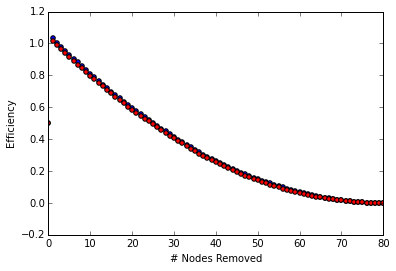

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(weight_res_pos[1])), weight_res_pos[1], c = 'b')
ax.scatter(range(len(weight_res_neg[1])), weight_res_neg[1], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

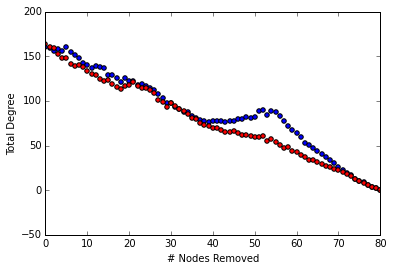

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(weight_res_pos[2])), weight_res_pos[2], c = 'b')
ax.scatter(range(len(weight_res_neg[2])), weight_res_neg[2], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Total Degree')

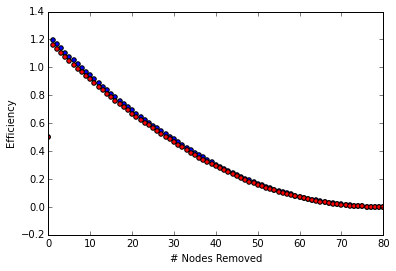

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(absolute_res_pos[1])), absolute_res_pos[1], c = 'b')
ax.scatter(range(len(absolute_res_neg[1])), absolute_res_neg[1], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

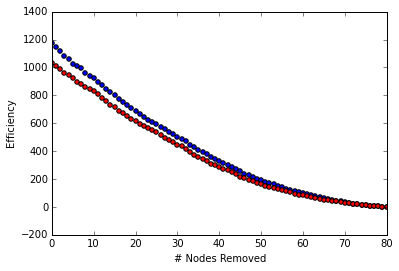

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(absolute_res_pos[2])), absolute_res_pos[2], c = 'b')
ax.scatter(range(len(absolute_res_neg[2])), absolute_res_neg[2], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Total Degree')

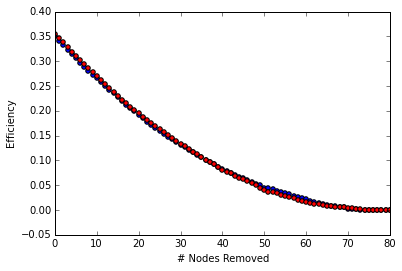

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(binary_res_pos[1])), binary_res_pos[1], c = 'b')
ax.scatter(range(len(binary_res_neg[1])), binary_res_neg[1], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

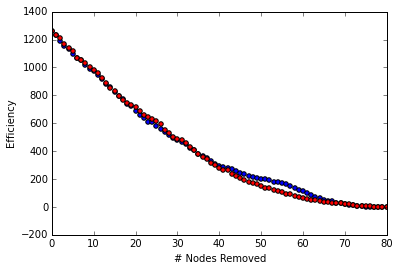

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(binary_res_pos[1])), binary_res_pos[2], c = 'b')
ax.scatter(range(len(binary_res_neg[1])), binary_res_neg[2], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

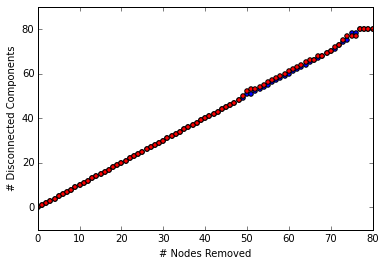

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(range(len(binary_res_pos[4])), binary_res_pos[4], c = 'b')
ax.scatter(range(len(binary_res_neg[4])), binary_res_neg[4], c = 'r')

plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('# Disconnected Components')

In [ ]:
#     print "Return value is a list of list of results - Indices for metrics:"
#     print "Modularity: 0"
#     print "Efficiency: 1"
#     print "Total Degree : 2"
#     print "Average Degree : 3"
#     print "# of disconnected components: 4"

In [92]:
def run_simulation(fnet, order, stop, binary = True, efficiency = False, modularity = False, total_degree = False, average_degree = False, disconnects = False):
    ''' Run lesion simulation
    Parameters
    ----------
    fnet : functional network
    pnet : PiB correlation network
    seed : beginning of simulated lesioning
    stop : terminate simulation after removing stop number of nodes
    
    binary, efficiency, modularity, total_degree, average_degree, disconnected:
        booleans controlling whether or not a particular should be tracked during
        node removals
        
    Returns
    -------
    mods : tracks modularity of functional network as nodes are removed
    effs : tracks efficiencies of functional network as nodes are removed
    total_deg : tracks total degree of functional network
    avg_deg : tracks average degree of functional network
    discs : tracks # of disconnected nodes in functional network

    Notes:
        -Partition of functional network is found using Newman Spectral
        -Efficiency is defined as the inverse of the average shortest path length
            of the functional network
    '''

    # Initial global metrics
    mods, effs, tot_deg, avg_deg, discs = [], [], [], [], []
    
#     if modularity:
#         ind = md.newman_partition(fnet, max_div=np.inf).index
#         part = md.GraphPartition(fnet, index=ind)
#         mods.append(part.modularity())
    if efficiency:
        effs.append(find_eff(fnet))
    if total_degree:
        if binary:
            tot_deg.append(sum(fnet.degree().values()))
        else:
            tot_deg.append(sum(fnet.degree(weight='weight').values()))
    if average_degree:
        if binary:
            avg_deg.append(np.mean(fnet.degree().values()))
        else:
            avg_deg.append(np.mean(fnet.degree().values()))
    if disconnects:
        discs.append(num_disconnects(fnet))
    
    removed = set([])
    
    for rem in order:
#         print "Length of Removed: " + str(len(removed))
        # Remove next node
        removed.add(rem)
        fnet.remove_edges_from(fnet.edges(rem))
        # Calculate new metrics
#         if modularity:
#             mods.append(md.GraphPartition(fnet, index=ind).modularity())
        if efficiency:
            effs.append(find_eff(fnet, binary))
        if total_degree:
            if binary:
                tot_deg.append(sum(fnet.degree().values()))
            else:
                tot_deg.append(sum(fnet.degree(weight='weight').values()))
        if average_degree:
            if binary:
                avg_deg.append(np.mean(fnet.degree().values()))
            else:
                avg_deg.append(np.mean(fnet.degree(weight='weight').values()))
        if disconnects:
            discs.append(num_disconnects(fnet))
    
#     print "Return value is a list of list of results - Indices for metrics:"
#     print "Modularity: 0"
#     print "Efficiency: 1"
#     print "Total Degree : 2"
#     print "Average Degree : 3"
#     print "# of disconnected components: 4"

    return [mods, effs, tot_deg, avg_deg, discs]

def find_eff(g, bin = True):
    ''' Finds the efficiency of a network
    Parameters
    ----------
    g : A graph
    
    Returns
    -------
    eff : Efficiency
    
    Notes:
    
    '''
    effs = []
    for node in g.nodes():
        nodal_effs = []
        for target in g.nodes():
            if node == target:
                continue
            else:
                try:
                    if bin:
                        sp = len(nx.shortest_path(g, node, target))
                    else:
                        sp = nx.shortest_path_length(g, node, target, weight='distance')
                    nodal_effs.append(1.0 / sp)
                except:
                    nodal_effs.append(0.0)
        effs.append(np.mean(nodal_effs))
    return np.mean(effs)

def get_subsess(path):
    ''' Given a path or string, finds the subuject's subsession'''
    if 'desikan/adjmat_gsr/' in str(path):
        direc = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/"
        ind1 = len(direc)
        ind2 = ind1 + 18
        return path[ind1:ind2]
    elif '/surf/simulation_trials/new_efficiency/individuals' in str(path):
        direc = '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/'
        ind1 = len(direc)
        ind2 = ind1 + 18
        return path[ind1:ind2]
    else:
        return

Matched Pair Analysis
==

In [140]:
results_dir = '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/'
bin_res_path = results_dir + '*binary.npy'
abs_res_path = results_dir + '*absolute.npy'
weight_res_path = results_dir + '*weighted.npy'

In [151]:
bin_res = sorted(glob(bin_res_path))
abs_res = sorted(glob(abs_res_path))
weight_res = sorted(glob(weight_res_path))

In [152]:
weight_res

['/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B05-216_2013-08-20_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B06-202_2009-03-19_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B06-203_2012-10-22_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B06-210_2011-08-04_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B06-219_2012-09-21_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B06-235_2007-08-08_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B07-227_2010-05-12_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/B07-228_2007-05-24_weighted.npy',
 '/home/jagust/dino/surf/simulation_trials/new_e

In [90]:
for i in range(len(neg_degs)):
    if neg_degs[i] > 350:
        del neg_degs[i]



Total Degree
t: 2.29117620373
p: 0.031032339211


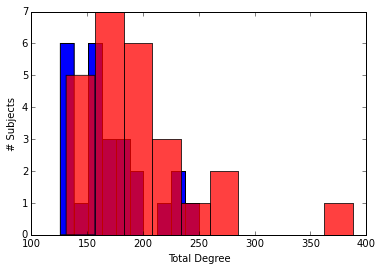

In [173]:
pos_degs, neg_degs = [], []
for m in match:
    pg, ng = nx.Graph(np.load(m[0])), nx.Graph(np.load(m[1]))
    remove_neg
    pos_degs.append(sum(pg.degree(weight='weight').values()))
    neg_degs.append(sum(ng.degree(weight='weight').values()))
plt.hist(pos_degs, color = 'b')
plt.hist(neg_degs, color = 'r', alpha = 0.75)
t, p = stats.ttest_rel(neg_degs, pos_degs)
plt.xlabel("Total Degree")
plt.ylabel("# Subjects")
print ""
print ""
print "Total Degree"
print "t: " + str(t)
print "p: " + str(p)

25 25
0.991796019463 +/- 0.00968558115843
0.996401530286 +/- 0.00656361255905

Average Shortest Path Length
t: -2.14531769904
p: 0.0422548270088


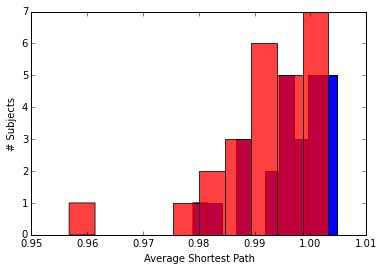

In [11]:
pos_sp, neg_sp = [], []
for m in match:
    pg, ng = nx.Graph(np.load(m[0])), nx.Graph(np.load(m[1]))
    add_distance_attr(pg)
    add_distance_attr(ng)
    pos_sp.append(nx.average_shortest_path_length(pg, weight='distance'))
    neg_sp.append(nx.average_shortest_path_length(ng, weight='distance'))
plt.hist(pos_sp, color = 'b')
plt.hist(neg_sp, color = 'r', alpha = 0.75)
t, p = stats.ttest_rel(neg_sp, pos_sp)

plt.xlabel("Average Shortest Path")
plt.ylabel("# Subjects")
print str(len(neg_sp)), str(len(pos_sp))
print str(np.mean(neg_sp)) + " +/- " + str(np.std(neg_sp))
print str(np.mean(pos_sp)) + " +/- " + str(np.std(pos_sp))
print ""
print "Average Shortest Path Length"
print "t: " + str(t)
print "p: " + str(p)

In [7]:
import os
os.chdir('/home/jagust/dino/surf/')
from surf import *
%matplotlib inline

In [3]:
def find_modularity(fnet):
    l = wmd.LouvainCommunityDetection(fnet)
    p = l.run()
    return p[-1].modularity()

In [5]:
match = np.load('/home/jagust/dino/surf/matches.npy')



Modularity
t: -2.42571746578
p: 0.0231651453957


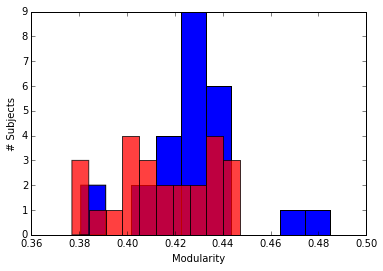

In [12]:
# pos_mod, neg_mod = [], []
for m in match:
    thr_matp, thr_matn = np.load(m[0]), np.load(m[1])
    pg, ng = nx.Graph(thr_matp), nx.Graph(thr_matn)
    remove_neg_weights(pg)
    remove_neg_weights(ng)

    # Find partition and modularity
    pos_mod.append(find_modularity(pg))
    neg_mod.append(find_modularity(ng))

    
plt.hist(pos_mod, color = 'b')
plt.hist(neg_mod, color = 'r', alpha = 0.75)
t, p = stats.ttest_rel(neg_mod, pos_mod)

print ""
print ""

plt.xlabel("Modularity")
plt.ylabel("# Subjects")
print "Modularity"
print "t: " + str(t)
print "p: " + str(p)



Modularity
t: -1.89483157416
p: 0.0702243464869


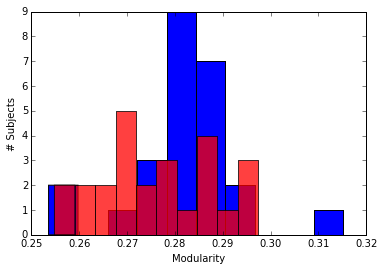

In [13]:
pos_small, neg_small = [], []
for m in match:
    thr_matp, thr_matn = np.load(m[0]), np.load(m[1])
    pg, ng = nx.Graph(thr_matp), nx.Graph(thr_matn)
    remove_neg_weights(pg)
    remove_neg_weights(ng)
    add_distance_attr(pg)
    add_distance_attr(ng)
    # Find partition and modularity
    pos_small.append(find_modularity(pg)/ nx.average_shortest_path_length(pg))
    neg_small.append(find_modularity(ng)/ nx.average_shortest_path_length(ng))

    
plt.hist(pos_small, color = 'b')
plt.hist(neg_small, color = 'r', alpha = 0.75)
t, p = stats.ttest_rel(neg_small, pos_small)

print ""
print ""

plt.xlabel("Modularity")
plt.ylabel("# Subjects")
print "Modularity"
print "t: " + str(t)
print "p: " + str(p)



Clustering Coefficient
t: 0.0341145927193
p: 0.973067918684


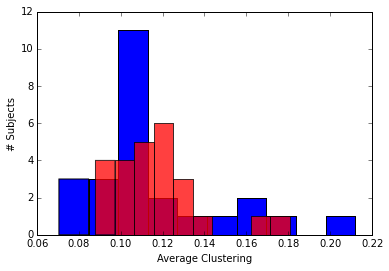

In [176]:
pos_clust, neg_clust = [], []
for m in match:
    pg, ng = nx.Graph(np.load(m[0])), nx.Graph(np.load(m[1]))
    add_distance_attr(pg)
    add_distance_attr(ng)
    remove_neg_weights(pg)
    remove_neg_weights(ng)
    pos_clust.append(nx.average_clustering(pg, weight='weight'))
    neg_clust.append(nx.average_clustering(ng, weight='weight'))
plt.hist(pos_clust, color = 'b')
plt.hist(neg_clust, color = 'r', alpha = 0.75)
t, p = stats.ttest_rel(neg_clust, pos_clust)

print ""
print ""
plt.xlabel("Average Clustering")
plt.ylabel("# Subjects")
print "Clustering Coefficient"
print "t: " + str(t)
print "p: " + str(p)

t: 0.0985618669129
p: 0.921896605431


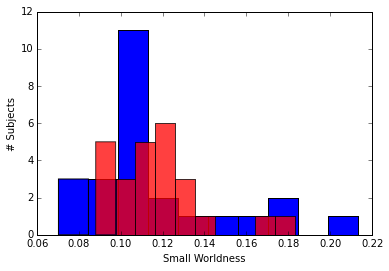

In [51]:
pos_small, neg_small = [], []
for ind in range(len(pos_clust)):
    pos_small.append(pos_clust[ind] / pos_sp[ind] * 1.0)
    neg_small.append(neg_clust[ind] / neg_sp[ind] * 1.0)
plt.hist(pos_small, color = 'b')
plt.hist(neg_small, color = 'r', alpha = 0.75)
t, p = stats.ttest_ind(neg_small, pos_small)

plt.xlabel("Small Worldness")
plt.ylabel("# Subjects")
print "t: " + str(t)
print "p: " + str(p)

t: -0.314048816994
p: 0.754844842074


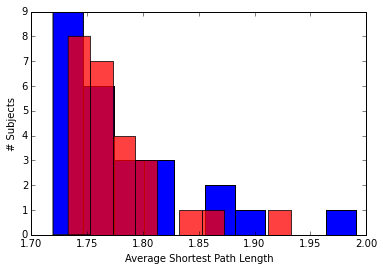

In [83]:
pos_sp, neg_sp = [], []
pos_clust, neg_clust = [], []
for m in match:
    m0, c0 = util.threshold_adjacency_matrix(np.load(m[0]), cost = 0.30)
    m1, c1 = util.threshold_adjacency_matrix(np.load(m[1]), cost = 0.30)
    pg, ng = nx.Graph(m0), nx.Graph(m1)
    pos_sp.append(nx.average_shortest_path_length(pg))
    neg_sp.append(nx.average_shortest_path_length(ng))
    
    pos_clust.append(nx.average_clustering(pg))
    neg_clust.append(nx.average_clustering(ng))
    
plt.hist(pos_sp, color = 'b')
plt.hist(neg_sp, color = 'r', alpha = 0.75)
t, p = stats.ttest_ind(neg_sp, pos_sp)

plt.xlabel("Average Shortest Path Length")
plt.ylabel("# Subjects")

print "t: " + str(t)
print "p: " + str(p)

t: -0.275585998793
p: 0.784049019507


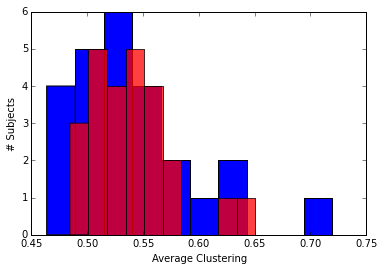

In [84]:
plt.hist(pos_clust, color = 'b')
plt.hist(neg_clust, color = 'r', alpha = 0.75)
t, p = stats.ttest_ind(neg_clust, pos_clust)

plt.xlabel("Average Clustering")
plt.ylabel("# Subjects")

print "t: " + str(t)
print "p: " + str(p)

t: 0.0976187269044
p: 0.923045740242


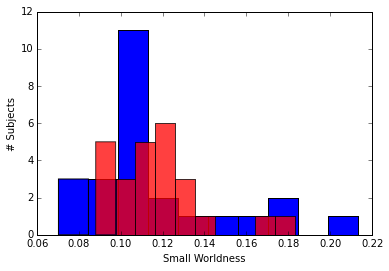

In [161]:
pos_small, neg_small = [], []
for ind in range(len(pos_clust)):
    pos_small.append(pos_clust[ind] / pos_sp[ind] * 1.0)
    neg_small.append(neg_clust[ind] / neg_sp[ind] * 1.0)

plt.hist(pos_small, color = 'b')
plt.hist(neg_small, color = 'r', alpha = 0.75)
t, p = stats.ttest_rel(neg_small, pos_small)

plt.xlabel("Small Worldness")
plt.ylabel("# Subjects")

print "t: " + str(t)
print "p: " + str(p)

In [154]:
def create_points_eff(checkpoint, func_net_type):
    x_vals_pos, y_vals_pos, x_vals_neg, y_vals_neg = [], [], [], []
    for p in func_net_type:
        results = np.load(p)
        subid = find_id(p)
        res = results[1][checkpoint]
        if res != res:
            continue
        if is_geno_pos(subid):
            x_vals_pos.append(checkpoint)
            y_vals_pos.append(results[1][checkpoint])
        elif is_geno_neg(subid):
            x_vals_neg.append(checkpoint)
            y_vals_neg.append(results[1][checkpoint])
    return x_vals_pos, y_vals_pos, x_vals_neg, y_vals_neg

def create_points_deg(checkpoint, func_net_type):
    x_vals_pos, y_vals_pos, x_vals_neg, y_vals_neg = [], [], [], []
    for p in func_net_type:
        results = np.load(p)
        subid = find_id(p)
        res = results[1][checkpoint]
        if res != res:
            continue
        if is_geno_pos(subid):
            x_vals_pos.append(checkpoint)
            y_vals_pos.append(results[2][checkpoint])
        elif is_geno_neg(subid):
            x_vals_neg.append(checkpoint)
            y_vals_neg.append(results[2][checkpoint])
    return x_vals_pos, y_vals_pos, x_vals_neg, y_vals_neg

def create_points_disc(checkpoint, func_net_type):
    x_vals_pos, y_vals_pos, x_vals_neg, y_vals_neg = [], [], [], []
    for p in func_net_type:
        results = np.load(p)
        subid = find_id(p)
        res = results[1][checkpoint]
        if res != res:
            continue
        if is_geno_pos(subid):
            x_vals_pos.append(checkpoint)
            y_vals_pos.append(results[4][checkpoint])
        elif is_geno_neg(subid):
            x_vals_neg.append(checkpoint)
            y_vals_neg.append(results[4][checkpoint])
    return x_vals_pos, y_vals_pos, x_vals_neg, y_vals_neg

E4 Negative Total Degree Results
# Nodes Removed : Mean , Std
0 - Mean: 1264.0 Std: 0.0
10 - Mean: 964.24 Std: 37.1001671155
20 - Mean: 691.52 Std: 34.3501033477
30 - Mean: 471.28 Std: 33.5088286874
40 - Mean: 284.48 Std: 27.1250732718
50 - Mean: 162.72 Std: 25.2341356103
60 - Mean: 74.24 Std: 14.3144123177
70 - Mean: 20.96 Std: 6.22562446667


E4 Positive Total Degree Results
# Nodes Removed : Mean , Std
0 - Mean: 1264.0 Std: 0.0
10 - Mean: 969.76 Std: 24.8664915097
20 - Mean: 698.64 Std: 35.4252791097
30 - Mean: 487.12 Std: 30.9222508883
40 - Mean: 294.32 Std: 29.8941064426
50 - Mean: 176.16 Std: 34.7881359087
60 - Mean: 84.4 Std: 20.1831612985
70 - Mean: 21.36 Std: 8.51765225869
Plot Total Degree


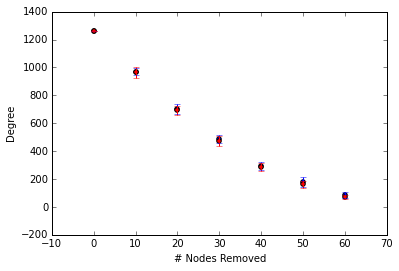

In [19]:
xpos0, ypos0, xneg0, yneg0 = create_points_deg(0, bin_res)
xpos10, ypos10, xneg10, yneg10 = create_points_deg(10, bin_res)
xpos20, ypos20, xneg20, yneg20 = create_points_deg(20, bin_res)
xpos30, ypos30, xneg30, yneg30 = create_points_deg(30, bin_res)
xpos40, ypos40, xneg40, yneg40 = create_points_deg(40, bin_res)
xpos50, ypos50, xneg50, yneg50 = create_points_deg(50, bin_res)
xpos60, ypos60, xneg60, yneg60 = create_points_deg(60, bin_res)
xpos70, ypos70, xneg70, yneg70 = create_points_deg(70, bin_res)

print "E4 Negative Total Degree Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(yneg0)) + " Std: " + str(np.std(yneg0))
print "10 - Mean: " + str(np.mean(yneg10)) + " Std: " + str(np.std(yneg10))
print "20 - Mean: " + str(np.mean(yneg20)) + " Std: " + str(np.std(yneg20))
print "30 - Mean: " + str(np.mean(yneg30)) + " Std: " + str(np.std(yneg30))
print "40 - Mean: " + str(np.mean(yneg40)) + " Std: " + str(np.std(yneg40))
print "50 - Mean: " + str(np.mean(yneg50)) + " Std: " + str(np.std(yneg50))
print "60 - Mean: " + str(np.mean(yneg60)) + " Std: " + str(np.std(yneg60))
print "70 - Mean: " + str(np.mean(yneg70)) + " Std: " + str(np.std(yneg70))
print ""
print ""
print "E4 Positive Total Degree Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(ypos0)) + " Std: " + str(np.std(ypos0))
print "10 - Mean: " + str(np.mean(ypos10)) + " Std: " + str(np.std(ypos10))
print "20 - Mean: " + str(np.mean(ypos20)) + " Std: " + str(np.std(ypos20))
print "30 - Mean: " + str(np.mean(ypos30)) + " Std: " + str(np.std(ypos30))
print "40 - Mean: " + str(np.mean(ypos40)) + " Std: " + str(np.std(ypos40))
print "50 - Mean: " + str(np.mean(ypos50)) + " Std: " + str(np.std(ypos50))
print "60 - Mean: " + str(np.mean(ypos60)) + " Std: " + str(np.std(ypos60))
print "70 - Mean: " + str(np.mean(ypos70)) + " Std: " + str(np.std(ypos70))

print "Plot Total Degree"
plt.figure()

plt.scatter(0, np.mean(ypos0), c = 'b')
plt.errorbar(0, np.mean(ypos0), yerr = np.std(ypos0), c = 'b')
plt.scatter(0, np.mean(yneg0), c = 'r')
plt.errorbar(0, np.mean(yneg0), yerr = np.std(yneg0), c = 'r')

plt.scatter(10, np.mean(ypos10), c = 'b')
plt.errorbar(10, np.mean(ypos10), yerr = np.std(ypos10), c = 'b')
plt.scatter(10, np.mean(yneg10), c = 'r')
plt.errorbar(10, np.mean(yneg10), yerr = np.std(yneg10), c = 'r')

plt.scatter(20, np.mean(ypos20), c = 'b')
plt.errorbar(20, np.mean(ypos20), yerr = np.std(ypos20), c = 'b')
plt.scatter(20, np.mean(yneg20), c = 'r')
plt.errorbar(20, np.mean(yneg20), yerr = np.std(yneg20), c = 'r')

plt.scatter(30, np.mean(ypos30), c = 'b')
plt.errorbar(30, np.mean(ypos30), yerr = np.std(ypos30), c = 'b')
plt.scatter(30, np.mean(yneg30), c = 'r')
plt.errorbar(30, np.mean(yneg30), yerr = np.std(yneg30), c = 'r')

plt.scatter(40, np.mean(ypos40), c = 'b')
plt.errorbar(40, np.mean(ypos40), yerr = np.std(ypos40), c = 'b')
plt.scatter(40, np.mean(yneg40), c = 'r')
plt.errorbar(40, np.mean(yneg40), yerr = np.std(yneg40), c = 'r')

plt.scatter(50, np.mean(ypos50), c = 'b')
plt.errorbar(50, np.mean(ypos50), yerr = np.std(ypos50), c = 'b')
plt.scatter(50, np.mean(yneg50), c = 'r')
plt.errorbar(50, np.mean(yneg50), yerr = np.std(yneg50), c = 'r')

plt.scatter(60, np.mean(ypos60), c = 'b')
plt.errorbar(60, np.mean(ypos60), yerr = np.std(ypos60), c = 'b')
plt.scatter(60, np.mean(yneg60), c = 'r')
plt.errorbar(60, np.mean(yneg60), yerr = np.std(yneg60), c = 'r')

plt.xlabel("# Nodes Removed")
plt.ylabel("Degree")

E4 Negative Disconnected Components Results
# Nodes Removed : Mean , Std
0 - Mean: 0.08 Std: 0.271293199325
10 - Mean: 10.08 Std: 0.271293199325
20 - Mean: 20.08 Std: 0.271293199325
30 - Mean: 30.12 Std: 0.324961536185
40 - Mean: 40.36 Std: 0.624819974073
50 - Mean: 50.64 Std: 0.889044430836
60 - Mean: 60.88 Std: 1.10706820025
70 - Mean: 71.2 Std: 1.29614813968


E4 Positive Disconnected Components Results
# Nodes Removed : Mean , Std
0 - Mean: 0.04 Std: 0.195959179423
10 - Mean: 10.08 Std: 0.271293199325
20 - Mean: 20.08 Std: 0.271293199325
30 - Mean: 30.08 Std: 0.271293199325
40 - Mean: 40.16 Std: 0.366606055596
50 - Mean: 50.68 Std: 1.00876161703
60 - Mean: 61.08 Std: 1.23028451994
70 - Mean: 71.52 Std: 1.36
Plot Disconnected Components


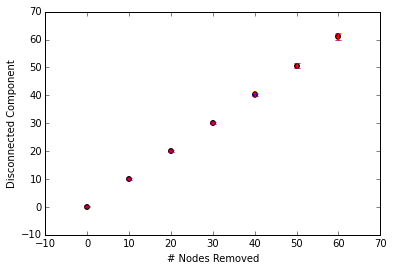

In [20]:
xpos0, ypos0, xneg0, yneg0 = create_points_disc(0, bin_res)
xpos10, ypos10, xneg10, yneg10 = create_points_disc(10, bin_res)
xpos20, ypos20, xneg20, yneg20 = create_points_disc(20, bin_res)
xpos30, ypos30, xneg30, yneg30 = create_points_disc(30, bin_res)
xpos40, ypos40, xneg40, yneg40 = create_points_disc(40, bin_res)
xpos50, ypos50, xneg50, yneg50 = create_points_disc(50, bin_res)
xpos60, ypos60, xneg60, yneg60 = create_points_disc(60, bin_res)
xpos70, ypos70, xneg70, yneg70 = create_points_disc(70, bin_res)

print "E4 Negative Disconnected Components Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(yneg0)) + " Std: " + str(np.std(yneg0))
print "10 - Mean: " + str(np.mean(yneg10)) + " Std: " + str(np.std(yneg10))
print "20 - Mean: " + str(np.mean(yneg20)) + " Std: " + str(np.std(yneg20))
print "30 - Mean: " + str(np.mean(yneg30)) + " Std: " + str(np.std(yneg30))
print "40 - Mean: " + str(np.mean(yneg40)) + " Std: " + str(np.std(yneg40))
print "50 - Mean: " + str(np.mean(yneg50)) + " Std: " + str(np.std(yneg50))
print "60 - Mean: " + str(np.mean(yneg60)) + " Std: " + str(np.std(yneg60))
print "70 - Mean: " + str(np.mean(yneg70)) + " Std: " + str(np.std(yneg70))
print ""
print ""
print "E4 Positive Disconnected Components Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(ypos0)) + " Std: " + str(np.std(ypos0))
print "10 - Mean: " + str(np.mean(ypos10)) + " Std: " + str(np.std(ypos10))
print "20 - Mean: " + str(np.mean(ypos20)) + " Std: " + str(np.std(ypos20))
print "30 - Mean: " + str(np.mean(ypos30)) + " Std: " + str(np.std(ypos30))
print "40 - Mean: " + str(np.mean(ypos40)) + " Std: " + str(np.std(ypos40))
print "50 - Mean: " + str(np.mean(ypos50)) + " Std: " + str(np.std(ypos50))
print "60 - Mean: " + str(np.mean(ypos60)) + " Std: " + str(np.std(ypos60))
print "70 - Mean: " + str(np.mean(ypos70)) + " Std: " + str(np.std(ypos70))

print "Plot Disconnected Components"
plt.figure()

plt.scatter(0, np.mean(ypos0), c = 'b')
plt.errorbar(0, np.mean(ypos0), yerr = np.std(ypos0), c = 'b')
plt.scatter(0, np.mean(yneg0), c = 'r')
plt.errorbar(0, np.mean(yneg0), yerr = np.std(yneg0), c = 'r')

plt.scatter(10, np.mean(ypos10), c = 'b')
plt.errorbar(10, np.mean(ypos10), yerr = np.std(ypos10), c = 'b')
plt.scatter(10, np.mean(yneg10), c = 'r')
plt.errorbar(10, np.mean(yneg10), yerr = np.std(yneg10), c = 'r')

plt.scatter(20, np.mean(ypos20), c = 'b')
plt.errorbar(20, np.mean(ypos20), yerr = np.std(ypos20), c = 'b')
plt.scatter(20, np.mean(yneg20), c = 'r')
plt.errorbar(20, np.mean(yneg20), yerr = np.std(yneg20), c = 'r')

plt.scatter(30, np.mean(ypos30), c = 'b')
plt.errorbar(30, np.mean(ypos30), yerr = np.std(ypos30), c = 'b')
plt.scatter(30, np.mean(yneg30), c = 'r')
plt.errorbar(30, np.mean(yneg30), yerr = np.std(yneg30), c = 'r')

plt.scatter(40, np.mean(ypos40), c = 'b')
plt.errorbar(40, np.mean(ypos40), yerr = np.std(ypos40), c = 'b')
plt.scatter(40, np.mean(yneg40), c = 'r')
plt.errorbar(40, np.mean(yneg40), yerr = np.std(yneg40), c = 'r')

plt.scatter(50, np.mean(ypos50), c = 'b')
plt.errorbar(50, np.mean(ypos50), yerr = np.std(ypos50), c = 'b')
plt.scatter(50, np.mean(yneg50), c = 'r')
plt.errorbar(50, np.mean(yneg50), yerr = np.std(yneg50), c = 'r')

plt.scatter(60, np.mean(ypos60), c = 'b')
plt.errorbar(60, np.mean(ypos60), yerr = np.std(ypos60), c = 'b')
plt.scatter(60, np.mean(yneg60), c = 'r')
plt.errorbar(60, np.mean(yneg60), yerr = np.std(yneg60), c = 'r')

plt.xlabel("# Nodes Removed")
plt.ylabel("Disconnected Component")

E4 Negative Efficiency Results
# Nodes Removed : Mean , Std
0 - Mean: 0.5 Std: 0.0
10 - Mean: 0.835896355889 Std: 0.0240598734575
20 - Mean: 0.610785436601 Std: 0.0183133144781
30 - Mean: 0.422637583505 Std: 0.0122096891926
40 - Mean: 0.267505580185 Std: 0.00840026733457
50 - Mean: 0.150249395729 Std: 0.0066825469219
60 - Mean: 0.0671629782071 Std: 0.00518455605452
70 - Mean: 0.0171111135426 Std: 0.00436720077016


E4 Positive Efficiency Results
# Nodes Removed : Mean , Std
0 - Mean: 0.5 Std: 0.0
10 - Mean: 0.831592925239 Std: 0.0308128918269
20 - Mean: 0.608578936348 Std: 0.0241456318313
30 - Mean: 0.422731820286 Std: 0.0187060153388
40 - Mean: 0.267449875043 Std: 0.0128146841122
50 - Mean: 0.151820701761 Std: 0.0109114922989
60 - Mean: 0.0681706026969 Std: 0.00661955493548
70 - Mean: 0.0171702702771 Std: 0.00397993235688
Plot Efficiencies


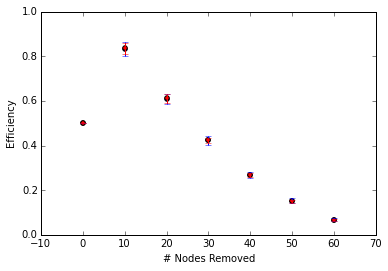

In [21]:
xpos0, ypos0, xneg0, yneg0 = create_points_eff(0, weight_res)
xpos10, ypos10, xneg10, yneg10 = create_points_eff(10, weight_res)
xpos20, ypos20, xneg20, yneg20 = create_points_eff(20, weight_res)
xpos30, ypos30, xneg30, yneg30 = create_points_eff(30, weight_res)
xpos40, ypos40, xneg40, yneg40 = create_points_eff(40, weight_res)
xpos50, ypos50, xneg50, yneg50 = create_points_eff(50, weight_res)
xpos60, ypos60, xneg60, yneg60 = create_points_eff(60, weight_res)
xpos70, ypos70, xneg70, yneg70 = create_points_eff(70, weight_res)

print "E4 Negative Efficiency Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(yneg0)) + " Std: " + str(np.std(yneg0))
print "10 - Mean: " + str(np.mean(yneg10)) + " Std: " + str(np.std(yneg10))
print "20 - Mean: " + str(np.mean(yneg20)) + " Std: " + str(np.std(yneg20))
print "30 - Mean: " + str(np.mean(yneg30)) + " Std: " + str(np.std(yneg30))
print "40 - Mean: " + str(np.mean(yneg40)) + " Std: " + str(np.std(yneg40))
print "50 - Mean: " + str(np.mean(yneg50)) + " Std: " + str(np.std(yneg50))
print "60 - Mean: " + str(np.mean(yneg60)) + " Std: " + str(np.std(yneg60))
print "70 - Mean: " + str(np.mean(yneg70)) + " Std: " + str(np.std(yneg70))
print ""
print ""
print "E4 Positive Efficiency Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(ypos0)) + " Std: " + str(np.std(ypos0))
print "10 - Mean: " + str(np.mean(ypos10)) + " Std: " + str(np.std(ypos10))
print "20 - Mean: " + str(np.mean(ypos20)) + " Std: " + str(np.std(ypos20))
print "30 - Mean: " + str(np.mean(ypos30)) + " Std: " + str(np.std(ypos30))
print "40 - Mean: " + str(np.mean(ypos40)) + " Std: " + str(np.std(ypos40))
print "50 - Mean: " + str(np.mean(ypos50)) + " Std: " + str(np.std(ypos50))
print "60 - Mean: " + str(np.mean(ypos60)) + " Std: " + str(np.std(ypos60))
print "70 - Mean: " + str(np.mean(ypos70)) + " Std: " + str(np.std(ypos70))

print "Plot Efficiencies"
plt.figure()

plt.scatter(0, np.mean(ypos0), c = 'b')
plt.errorbar(0, np.mean(ypos0), yerr = np.std(ypos0), c = 'b')
plt.scatter(0, np.mean(yneg0), c = 'r')
plt.errorbar(0, np.mean(yneg0), yerr = np.std(yneg0), c = 'r')

plt.scatter(10, np.mean(ypos10), c = 'b')
plt.errorbar(10, np.mean(ypos10), yerr = np.std(ypos10), c = 'b')
plt.scatter(10, np.mean(yneg10), c = 'r')
plt.errorbar(10, np.mean(yneg10), yerr = np.std(yneg10), c = 'r')

plt.scatter(20, np.mean(ypos20), c = 'b')
plt.errorbar(20, np.mean(ypos20), yerr = np.std(ypos20), c = 'b')
plt.scatter(20, np.mean(yneg20), c = 'r')
plt.errorbar(20, np.mean(yneg20), yerr = np.std(yneg20), c = 'r')

plt.scatter(30, np.mean(ypos30), c = 'b')
plt.errorbar(30, np.mean(ypos30), yerr = np.std(ypos30), c = 'b')
plt.scatter(30, np.mean(yneg30), c = 'r')
plt.errorbar(30, np.mean(yneg30), yerr = np.std(yneg30), c = 'r')

plt.scatter(40, np.mean(ypos40), c = 'b')
plt.errorbar(40, np.mean(ypos40), yerr = np.std(ypos40), c = 'b')
plt.scatter(40, np.mean(yneg40), c = 'r')
plt.errorbar(40, np.mean(yneg40), yerr = np.std(yneg40), c = 'r')

plt.scatter(50, np.mean(ypos50), c = 'b')
plt.errorbar(50, np.mean(ypos50), yerr = np.std(ypos50), c = 'b')
plt.scatter(50, np.mean(yneg50), c = 'r')
plt.errorbar(50, np.mean(yneg50), yerr = np.std(yneg50), c = 'r')

plt.scatter(60, np.mean(ypos60), c = 'b')
plt.errorbar(60, np.mean(ypos60), yerr = np.std(ypos60), c = 'b')
plt.scatter(60, np.mean(yneg60), c = 'r')
plt.errorbar(60, np.mean(yneg60), yerr = np.std(yneg60), c = 'r')

plt.xlabel("# Nodes Removed")
plt.ylabel("Efficiency")

In [138]:
weight_res

[[],
 [0.5,
  1.0168266697302619,
  0.99198085991397877,
  0.96525389746661383,
  0.94038868516269947,
  0.91593996256746613,
  0.89086107839316919,
  0.8672294432711336,
  0.8443424130974545,
  0.82148367365776276,
  0.79863035384731895,
  0.77604604580605541,
  0.75322174584410939,
  0.73088010499910649,
  0.70828896818913234,
  0.68754511837287069,
  0.66509302931642311,
  0.64383405012878914,
  0.62378660814883347,
  0.60442762964347785,
  0.58538735615157955,
  0.56647851679904648,
  0.54755820284840218,
  0.52908707597577176,
  0.51125043717302265,
  0.49361702822761444,
  0.47534351403335917,
  0.45612798363534851,
  0.43908791223552945,
  0.42128125818480566,
  0.40583309034170767,
  0.38968608521103343,
  0.37390095458853401,
  0.35667999560699187,
  0.34034230486412398,
  0.32503140104639605,
  0.30990418332627556,
  0.29567423622384392,
  0.28097346348656382,
  0.2678455435655816,
  0.25473141111322811,
  0.24239300365412095,
  0.23020227425988726,
  0.21779669431894771,
  0

Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
Subject ID not found
E4 Negative Total Degree Results
# Nodes Removed : Mean , Std
0 - Mean: 196.51707122 Std: 54.8825451522
10 - Mean: 170.284744519 Std: 52.9440325378
20 - Mean: 131.058796216 Std: 31.7706229965
30 - Mean: 104.693417403 Std: 17.9381992065
40 - Mean: 76.682923489 Std: 8.38937719299
50 - Mean: 68.5986760225 Std: 11.2308232506
60 - Mean: 48.9101908088 Std: 7.8468984513
70 - Mean: 23.5612158381 Std: 3.47833952618


E4 Positive Total Degree Results
# Nodes Removed : Mean , Std
0 - Mean: 169.706262405 Std: 33.6094000174
10 - Mean: 147.413648681 Std: 25.7817145473
20 - Mean: 118.816981603 Std: 21.1735403684
30 - Mean: 99.4282818813 Std: 16.9412455273
40 - Mean: 77.1

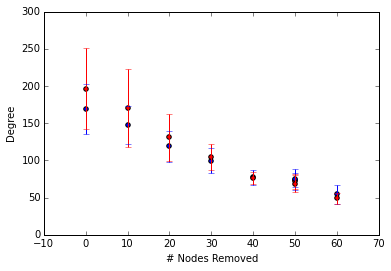

In [155]:
xpos0, ypos0, xneg0, yneg0 = create_points_deg(0, weight_res)
xpos10, ypos10, xneg10, yneg10 = create_points_deg(10, weight_res)
xpos20, ypos20, xneg20, yneg20 = create_points_deg(20, weight_res)
xpos30, ypos30, xneg30, yneg30 = create_points_deg(30, weight_res)
xpos40, ypos40, xneg40, yneg40 = create_points_deg(40, weight_res)
xpos50, ypos50, xneg50, yneg50 = create_points_deg(50, weight_res)
xpos60, ypos60, xneg60, yneg60 = create_points_deg(60, weight_res)
xpos70, ypos70, xneg70, yneg70 = create_points_deg(70, weight_res)

# xpos5, ypos5, xneg5, yneg5 = create_points_deg(5, weight_res)
# xpos15, ypos15, xneg15, yneg15 = create_points_deg(15, weight_res)
# xpos25, ypos25, xneg25, yneg25 = create_points_deg(25, weight_res)
# xpos35, ypos35, xneg35, yneg35 = create_points_deg(35, weight_res)
# xpos45, ypos45, xneg45, yneg45 = create_points_deg(45, weight_res)
# xpos55, ypos55, xneg55, yneg55 = create_points_deg(55, weight_res)
# xpos65, ypos65, xneg65, yneg65 = create_points_deg(65, weight_res)
# xpos75, ypos75, xneg75, yneg75 = create_points_deg(75, weight_res)

print "E4 Negative Total Degree Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(yneg0)) + " Std: " + str(np.std(yneg0))
print "10 - Mean: " + str(np.mean(yneg10)) + " Std: " + str(np.std(yneg10))
print "20 - Mean: " + str(np.mean(yneg20)) + " Std: " + str(np.std(yneg20))
print "30 - Mean: " + str(np.mean(yneg30)) + " Std: " + str(np.std(yneg30))
print "40 - Mean: " + str(np.mean(yneg40)) + " Std: " + str(np.std(yneg40))
print "50 - Mean: " + str(np.mean(yneg50)) + " Std: " + str(np.std(yneg50))
print "60 - Mean: " + str(np.mean(yneg60)) + " Std: " + str(np.std(yneg60))
print "70 - Mean: " + str(np.mean(yneg70)) + " Std: " + str(np.std(yneg70))
print ""
print ""
print "E4 Positive Total Degree Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(ypos0)) + " Std: " + str(np.std(ypos0))
print "10 - Mean: " + str(np.mean(ypos10)) + " Std: " + str(np.std(ypos10))
print "20 - Mean: " + str(np.mean(ypos20)) + " Std: " + str(np.std(ypos20))
print "30 - Mean: " + str(np.mean(ypos30)) + " Std: " + str(np.std(ypos30))
print "40 - Mean: " + str(np.mean(ypos40)) + " Std: " + str(np.std(ypos40))
print "50 - Mean: " + str(np.mean(ypos50)) + " Std: " + str(np.std(ypos50))
print "60 - Mean: " + str(np.mean(ypos60)) + " Std: " + str(np.std(ypos60))
print "70 - Mean: " + str(np.mean(ypos70)) + " Std: " + str(np.std(ypos70))

print "Plot Total Degree"
plt.figure()

plt.scatter(0, np.mean(ypos0), c = 'b')
plt.errorbar(0, np.mean(ypos0), yerr = np.std(ypos0), c = 'b')
plt.scatter(0, np.mean(yneg0), c = 'r')
plt.errorbar(0, np.mean(yneg0), yerr = np.std(yneg0), c = 'r')

plt.scatter(10, np.mean(ypos10), c = 'b')
plt.errorbar(10, np.mean(ypos10), yerr = np.std(ypos10), c = 'b')
plt.scatter(10, np.mean(yneg10), c = 'r')
plt.errorbar(10, np.mean(yneg10), yerr = np.std(yneg10), c = 'r')


plt.scatter(20, np.mean(ypos20), c = 'b')
plt.errorbar(20, np.mean(ypos20), yerr = np.std(ypos20), c = 'b')
plt.scatter(20, np.mean(yneg20), c = 'r')
plt.errorbar(20, np.mean(yneg20), yerr = np.std(yneg20), c = 'r')

plt.scatter(30, np.mean(ypos30), c = 'b')
plt.errorbar(30, np.mean(ypos30), yerr = np.std(ypos30), c = 'b')
plt.scatter(30, np.mean(yneg30), c = 'r')
plt.errorbar(30, np.mean(yneg30), yerr = np.std(yneg30), c = 'r')


plt.scatter(40, np.mean(ypos40), c = 'b')
plt.errorbar(40, np.mean(ypos40), yerr = np.std(ypos40), c = 'b')
plt.scatter(40, np.mean(yneg40), c = 'r')
plt.errorbar(40, np.mean(yneg40), yerr = np.std(yneg40), c = 'r')

plt.scatter(50, np.mean(ypos45), c = 'b')
plt.errorbar(50, np.mean(ypos45), yerr = np.std(ypos45), c = 'b')
plt.scatter(50, np.mean(yneg45), c = 'r')
plt.errorbar(50, np.mean(yneg45), yerr = np.std(yneg45), c = 'r')


plt.scatter(50, np.mean(ypos50), c = 'b')
plt.errorbar(50, np.mean(ypos50), yerr = np.std(ypos50), c = 'b')
plt.scatter(50, np.mean(yneg50), c = 'r')
plt.errorbar(50, np.mean(yneg50), yerr = np.std(yneg50), c = 'r')

plt.scatter(60, np.mean(ypos60), c = 'b')
plt.errorbar(60, np.mean(ypos60), yerr = np.std(ypos60), c = 'b')
plt.scatter(60, np.mean(yneg60), c = 'r')
plt.errorbar(60, np.mean(yneg60), yerr = np.std(yneg60), c = 'r')



plt.xlabel("# Nodes Removed")
plt.ylabel("Degree")

E4 Negative Efficiency Results
# Nodes Removed : Mean , Std
0 - Mean: 0.5 Std: 0.0
10 - Mean: 0.997958224255 Std: 0.0445242581101
20 - Mean: 0.731882352927 Std: 0.03641700473
30 - Mean: 0.506970317145 Std: 0.0257183274316
40 - Mean: 0.321297216799 Std: 0.0174253451439
50 - Mean: 0.176734471914 Std: 0.0110352384437
60 - Mean: 0.0775336943174 Std: 0.00653066684301
70 - Mean: 0.0196342026275 Std: 0.004615650881


E4 Positive Efficiency Results
# Nodes Removed : Mean , Std
0 - Mean: 0.5 Std: 0.0
10 - Mean: 0.999082794237 Std: 0.0671010875467
20 - Mean: 0.733039805412 Std: 0.0516287926537
30 - Mean: 0.510055153121 Std: 0.0393104278414
40 - Mean: 0.321790399868 Std: 0.0267983689131
50 - Mean: 0.178136712009 Std: 0.0187637601898
60 - Mean: 0.078060140806 Std: 0.00962625904801
70 - Mean: 0.0194957341181 Std: 0.00441497860988
Plot Efficiencies


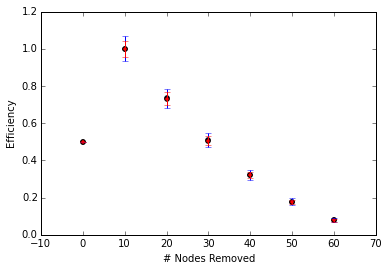

In [52]:
xpos0, ypos0, xneg0, yneg0 = create_points_eff(0, abs_res)
xpos10, ypos10, xneg10, yneg10 = create_points_eff(10, abs_res)
xpos20, ypos20, xneg20, yneg20 = create_points_eff(20, abs_res)
xpos30, ypos30, xneg30, yneg30 = create_points_eff(30, abs_res)
xpos40, ypos40, xneg40, yneg40 = create_points_eff(40, abs_res)
xpos50, ypos50, xneg50, yneg50 = create_points_eff(50, abs_res)
xpos60, ypos60, xneg60, yneg60 = create_points_eff(60, abs_res)
xpos70, ypos70, xneg70, yneg70 = create_points_eff(70, abs_res)

print "E4 Negative Efficiency Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(yneg0)) + " Std: " + str(np.std(yneg0))
print "10 - Mean: " + str(np.mean(yneg10)) + " Std: " + str(np.std(yneg10))
print "20 - Mean: " + str(np.mean(yneg20)) + " Std: " + str(np.std(yneg20))
print "30 - Mean: " + str(np.mean(yneg30)) + " Std: " + str(np.std(yneg30))
print "40 - Mean: " + str(np.mean(yneg40)) + " Std: " + str(np.std(yneg40))
print "50 - Mean: " + str(np.mean(yneg50)) + " Std: " + str(np.std(yneg50))
print "60 - Mean: " + str(np.mean(yneg60)) + " Std: " + str(np.std(yneg60))
print "70 - Mean: " + str(np.mean(yneg70)) + " Std: " + str(np.std(yneg70))
print ""
print ""
print "E4 Positive Efficiency Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(ypos0)) + " Std: " + str(np.std(ypos0))
print "10 - Mean: " + str(np.mean(ypos10)) + " Std: " + str(np.std(ypos10))
print "20 - Mean: " + str(np.mean(ypos20)) + " Std: " + str(np.std(ypos20))
print "30 - Mean: " + str(np.mean(ypos30)) + " Std: " + str(np.std(ypos30))
print "40 - Mean: " + str(np.mean(ypos40)) + " Std: " + str(np.std(ypos40))
print "50 - Mean: " + str(np.mean(ypos50)) + " Std: " + str(np.std(ypos50))
print "60 - Mean: " + str(np.mean(ypos60)) + " Std: " + str(np.std(ypos60))
print "70 - Mean: " + str(np.mean(ypos70)) + " Std: " + str(np.std(ypos70))

print "Plot Efficiencies"
plt.figure()

plt.scatter(0, np.mean(ypos0), c = 'b')
plt.errorbar(0, np.mean(ypos0), yerr = np.std(ypos0), c = 'b')
plt.scatter(0, np.mean(yneg0), c = 'r')
plt.errorbar(0, np.mean(yneg0), yerr = np.std(yneg0), c = 'r')

plt.scatter(10, np.mean(ypos10), c = 'b')
plt.errorbar(10, np.mean(ypos10), yerr = np.std(ypos10), c = 'b')
plt.scatter(10, np.mean(yneg10), c = 'r')
plt.errorbar(10, np.mean(yneg10), yerr = np.std(yneg10), c = 'r')

plt.scatter(20, np.mean(ypos20), c = 'b')
plt.errorbar(20, np.mean(ypos20), yerr = np.std(ypos20), c = 'b')
plt.scatter(20, np.mean(yneg20), c = 'r')
plt.errorbar(20, np.mean(yneg20), yerr = np.std(yneg20), c = 'r')

plt.scatter(30, np.mean(ypos30), c = 'b')
plt.errorbar(30, np.mean(ypos30), yerr = np.std(ypos30), c = 'b')
plt.scatter(30, np.mean(yneg30), c = 'r')
plt.errorbar(30, np.mean(yneg30), yerr = np.std(yneg30), c = 'r')

plt.scatter(40, np.mean(ypos40), c = 'b')
plt.errorbar(40, np.mean(ypos40), yerr = np.std(ypos40), c = 'b')
plt.scatter(40, np.mean(yneg40), c = 'r')
plt.errorbar(40, np.mean(yneg40), yerr = np.std(yneg40), c = 'r')

plt.scatter(50, np.mean(ypos50), c = 'b')
plt.errorbar(50, np.mean(ypos50), yerr = np.std(ypos50), c = 'b')
plt.scatter(50, np.mean(yneg50), c = 'r')
plt.errorbar(50, np.mean(yneg50), yerr = np.std(yneg50), c = 'r')

plt.scatter(60, np.mean(ypos60), c = 'b')
plt.errorbar(60, np.mean(ypos60), yerr = np.std(ypos60), c = 'b')
plt.scatter(60, np.mean(yneg60), c = 'r')
plt.errorbar(60, np.mean(yneg60), yerr = np.std(yneg60), c = 'r')

plt.xlabel("# Nodes Removed")
plt.ylabel("Efficiency")

E4 Negative Total Degree Results
# Nodes Removed : Mean , Std
0 - Mean: 1386.39938469 Std: 149.98619558
10 - Mean: 1075.4592436 Std: 107.144464747
20 - Mean: 804.425863562 Std: 85.686394904
30 - Mean: 572.946916826 Std: 59.4829937416
40 - Mean: 375.54537166 Std: 39.2398560268
50 - Mean: 217.629079971 Std: 24.914483096
60 - Mean: 107.932628157 Std: 10.6138149328
70 - Mean: 37.6091473414 Std: 3.92421717612


E4 Positive Total Degree Results
# Nodes Removed : Mean , Std
0 - Mean: 1385.06270166 Std: 220.283272211
10 - Mean: 1081.29725452 Std: 168.257737165
20 - Mean: 809.36797201 Std: 126.422046807
30 - Mean: 582.585365662 Std: 94.8567827186
40 - Mean: 378.331613886 Std: 65.5083714031
50 - Mean: 221.366609719 Std: 43.5901907905
60 - Mean: 109.932282657 Std: 20.3664647779
70 - Mean: 37.6865969693 Std: 6.20444077888
Plot Total Degree


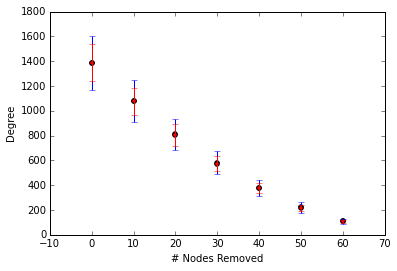

In [53]:
xpos0, ypos0, xneg0, yneg0 = create_points_deg(0, abs_res)
xpos10, ypos10, xneg10, yneg10 = create_points_deg(10, abs_res)
xpos20, ypos20, xneg20, yneg20 = create_points_deg(20, abs_res)
xpos30, ypos30, xneg30, yneg30 = create_points_deg(30, abs_res)
xpos40, ypos40, xneg40, yneg40 = create_points_deg(40, abs_res)
xpos50, ypos50, xneg50, yneg50 = create_points_deg(50, abs_res)
xpos60, ypos60, xneg60, yneg60 = create_points_deg(60, abs_res)
xpos70, ypos70, xneg70, yneg70 = create_points_deg(70, abs_res)

print "E4 Negative Total Degree Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(yneg0)) + " Std: " + str(np.std(yneg0))
print "10 - Mean: " + str(np.mean(yneg10)) + " Std: " + str(np.std(yneg10))
print "20 - Mean: " + str(np.mean(yneg20)) + " Std: " + str(np.std(yneg20))
print "30 - Mean: " + str(np.mean(yneg30)) + " Std: " + str(np.std(yneg30))
print "40 - Mean: " + str(np.mean(yneg40)) + " Std: " + str(np.std(yneg40))
print "50 - Mean: " + str(np.mean(yneg50)) + " Std: " + str(np.std(yneg50))
print "60 - Mean: " + str(np.mean(yneg60)) + " Std: " + str(np.std(yneg60))
print "70 - Mean: " + str(np.mean(yneg70)) + " Std: " + str(np.std(yneg70))
print ""
print ""
print "E4 Positive Total Degree Results"
print "# Nodes Removed : Mean , Std"
print "0 - Mean: " + str(np.mean(ypos0)) + " Std: " + str(np.std(ypos0))
print "10 - Mean: " + str(np.mean(ypos10)) + " Std: " + str(np.std(ypos10))
print "20 - Mean: " + str(np.mean(ypos20)) + " Std: " + str(np.std(ypos20))
print "30 - Mean: " + str(np.mean(ypos30)) + " Std: " + str(np.std(ypos30))
print "40 - Mean: " + str(np.mean(ypos40)) + " Std: " + str(np.std(ypos40))
print "50 - Mean: " + str(np.mean(ypos50)) + " Std: " + str(np.std(ypos50))
print "60 - Mean: " + str(np.mean(ypos60)) + " Std: " + str(np.std(ypos60))
print "70 - Mean: " + str(np.mean(ypos70)) + " Std: " + str(np.std(ypos70))

print "Plot Total Degree"
plt.figure()

plt.scatter(0, np.mean(ypos0), c = 'b')
plt.errorbar(0, np.mean(ypos0), yerr = np.std(ypos0), c = 'b')
plt.scatter(0, np.mean(yneg0), c = 'r')
plt.errorbar(0, np.mean(yneg0), yerr = np.std(yneg0), c = 'r')

plt.scatter(10, np.mean(ypos10), c = 'b')
plt.errorbar(10, np.mean(ypos10), yerr = np.std(ypos10), c = 'b')
plt.scatter(10, np.mean(yneg10), c = 'r')
plt.errorbar(10, np.mean(yneg10), yerr = np.std(yneg10), c = 'r')

plt.scatter(20, np.mean(ypos20), c = 'b')
plt.errorbar(20, np.mean(ypos20), yerr = np.std(ypos20), c = 'b')
plt.scatter(20, np.mean(yneg20), c = 'r')
plt.errorbar(20, np.mean(yneg20), yerr = np.std(yneg20), c = 'r')

plt.scatter(30, np.mean(ypos30), c = 'b')
plt.errorbar(30, np.mean(ypos30), yerr = np.std(ypos30), c = 'b')
plt.scatter(30, np.mean(yneg30), c = 'r')
plt.errorbar(30, np.mean(yneg30), yerr = np.std(yneg30), c = 'r')

plt.scatter(40, np.mean(ypos40), c = 'b')
plt.errorbar(40, np.mean(ypos40), yerr = np.std(ypos40), c = 'b')
plt.scatter(40, np.mean(yneg40), c = 'r')
plt.errorbar(40, np.mean(yneg40), yerr = np.std(yneg40), c = 'r')

plt.scatter(50, np.mean(ypos50), c = 'b')
plt.errorbar(50, np.mean(ypos50), yerr = np.std(ypos50), c = 'b')
plt.scatter(50, np.mean(yneg50), c = 'r')
plt.errorbar(50, np.mean(yneg50), yerr = np.std(yneg50), c = 'r')

plt.scatter(60, np.mean(ypos60), c = 'b')
plt.errorbar(60, np.mean(ypos60), yerr = np.std(ypos60), c = 'b')
plt.scatter(60, np.mean(yneg60), c = 'r')
plt.errorbar(60, np.mean(yneg60), yerr = np.std(yneg60), c = 'r')

plt.xlabel("# Nodes Removed")
plt.ylabel("Degree")

Preparing for meeting with Tim
==

In [123]:
eff_neg = np.load('/home/jagust/dino/surf/simulation_trials/subgroup_func_group_pib/e4_negative_efficiency.npy')
mod_neg = np.load('/home/jagust/dino/surf/simulation_trials/subgroup_func_group_pib/e4_negative_modularity.npy')

eff_pos = np.load('/home/jagust/dino/surf/simulation_trials/subgroup_func_group_pib/e4_positive_efficiency.npy')
mod_pos = np.load('/home/jagust/dino/surf/simulation_trials/subgroup_func_group_pib/e4_positive_modularity.npy')

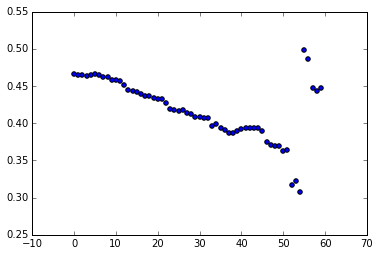

In [126]:
plt.figure()

plt.scatter(range(60), eff_neg, c = 'b')
# plt.scatter(range(60), np.mean(yneg0), c = 'r')
# plt.err

In [125]:
weight_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_weighted.npy')
weight_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_weighted.npy')

absolute_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_absolute.npy')
absolute_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_absolute.npy')

binary_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_binary.npy')
binary_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_binary.npy')

60

In [ ]:
# weight_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_weighted.npy')
# weight_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_weighted.npy')

# absolute_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_absolute.npy')
# absolute_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_absolute.npy')

# binary_res_pos = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/pos_group_binary.npy')
# binary_res_neg = np.load('/home/jagust/dino/surf/simulation_trials/new_efficiency/individuals/ignore_pib_pos/neg_group_binary.npy')

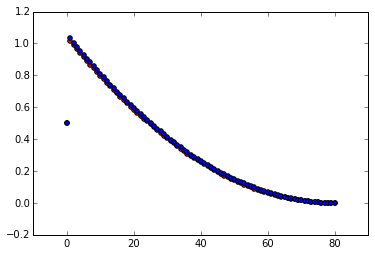

In [135]:
plt.figure()
plt.scatter(range(81), weight_res_neg[1], c = 'r')
plt.scatter(range(81), weight_res_pos[1], c = 'b')
plt.xlabel('# Nodes Removed')

In [132]:

print len(weight_res_pos[1])

81
